In [19]:
import numpy as np
import random
import timeit
import copy
import matplotlib.pyplot as plt

# Merge Sort

In [20]:
'''
Merge Function
'''
def merge(res,left, right):
    i,j,k = 0, 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            res[k] = left[i]
            i += 1
        else:
            res[k] = right[j]
            j += 1
        
        k += 1
    
    #Add in Remaining Elements
    while i < len(left):
        res[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        res[k] = right[j]
        j += 1
        k += 1
    
    return res

'''
Merge Sort
Reference : 
'''
def MergeSort(ary):
    if len(ary) <= 1:
        return ary

    med = len(ary) // 2
    ary1 = ary[:med]
    ary2 = ary[med:]

    ary1 = MergeSort(ary1)
    ary2 = MergeSort(ary2)

    return merge(ary, ary1, ary2)

# Insertion Sort

In [21]:
'''
Insertion Sort
Reference : https://www.geeksforgeeks.org/insertion-sort/
'''
def InsertionSort(ary, n):
    
    for i in range(1, n):
        curr = ary[i]
        j = i - 1

        while j >= 0 and curr < ary[j]:
            ary[j + 1] = ary[j]
            j -= 1
        
        ary[j + 1] = curr

# Test Code

- Used to Generate the Arrays we will be sorting with

## GenerateRandomArray
- Generate a random array using Python Random Module

## GenerateNearlySorted
- Generate a nearly sorted array

## GenerateReverseArray
- Generate an array sorted in reverse order

In [22]:
'''
Generate A Random Array of Size n
'''
def GenerateRandomArray(n):
    return random.sample(range(n), n)


'''
Generate Nearly Sorted Array
'''
def GenerateNearlySorted(n):
    res = GenerateRandomArray(n)
    res.sort()
    #Randomize one of the values
    rand_index = random.randint(0, n - 1)
    res[rand_index] = res[rand_index] + random.randint(21, 100)

    return res

'''
Generate a Reverse Order Array
'''
def GenerateReverseArray(n):
    res = GenerateRandomArray(n)
    res.sort(reverse=True)
    return res

## The Procedure

1. For the first iteration, we will use X incremented by 10s, indicating the Size of the array
2. We will run the experiment, and add the x and y values to their respective arrays
3. We will plot these values using the Matplotlib Library
4. Once we find the general range where insertion sort preforms faster than merge sort, we will run this experiment again, this time using smaller ranges of X

In [23]:
def RunTest(gen):
    insertionX = []
    insertionY = []


    mergeX = []
    mergeY = []

    if gen == 1:
        label = "Sort Times Using Random Array Values"
    
    if gen == 2:
        label = "Sort Times Using Nearly Sorted Array Values"

    if gen == 3:
        label = "Sort Times Using Reverse Order Values"

    for size in range(10, 1000, 10):
        # Copy the Array

        if (gen == 1):
            x = GenerateRandomArray(size)
        
        if (gen == 2):
            x = GenerateNearlySorted(size)

        if (gen == 3):
            x = GenerateReverseArray(size)


        mergeCopy = copy.deepcopy(x)
        insertionCopy = copy.deepcopy(x)

        mergeX.append(size)
        insertionX.append(size)

        # Run Merge Sort
        starttime = timeit.default_timer()
        res = MergeSort(mergeCopy)
        endtime = timeit.default_timer() - starttime
        mergeY.append(endtime)

        # Run Insertion Sort

        starttime = timeit.default_timer()
        InsertionSort(insertionCopy, len(insertionCopy))
        endtime = timeit.default_timer() - starttime
        insertionY.append(endtime)
 
    plt.plot(insertionX,insertionY)
    plt.plot(mergeX, mergeY)

    plt.legend(["Insertion Sort", "Merge Sort"], loc="upper left")
    plt.xlabel("Input Array Size")
    plt.ylabel("Time (seconds)")
    plt.title(label)

    plt.show()

# Plot the Points

- Initially lets observe this plot from 10 - 1000
- We can see that around X = 100 we notice a closer times

### Random Array Values

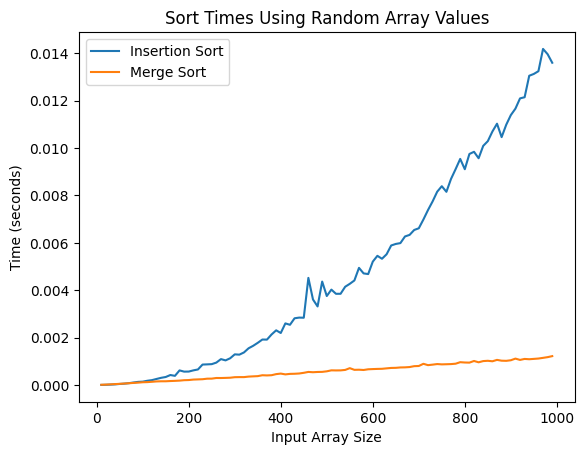

In [24]:
RunTest(1)

### Nearly Sorted Array

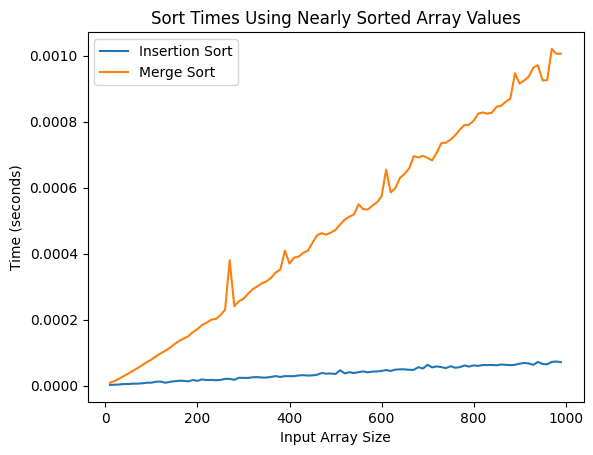

In [25]:
RunTest(2)

### Reverse Order Array

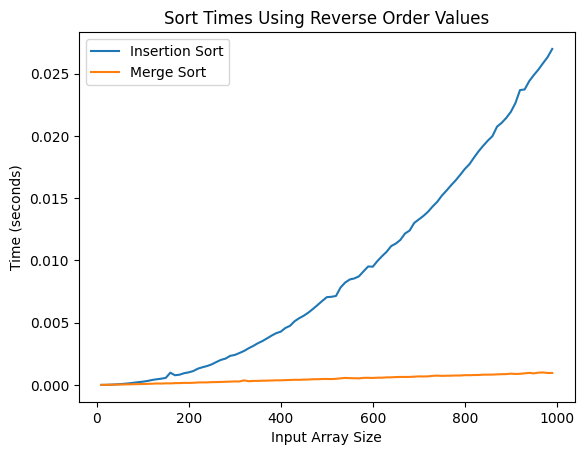

In [26]:
RunTest(3)

## Reducing our range to better find the point.

It looks like values 100 and lower for our input array size deem a closer value. We are going to modify our code a bit to account for the smaller input sizes. We will also have a variable that keeps track of the point where insertion is lower than merge sort, and plot this point on the graph.

In [27]:
def ReducedAverageTest(gen):
    insertionX = []
    insertionY = []

    mergeX = []
    mergeY = []

    breakpoint = None

    if gen == 1:
        label = "Sort Times Using Random Array Values"
    
    if gen == 2:
        label = "Sort Times Using Nearly Sorted Array Values"

    if gen == 3:
        label = "Sort Times Using Reverse Order Values"

    repititions = 1000

    for size in range(100, 1, -1):
        # Copy the Array

        if (gen == 1):
            x = GenerateRandomArray(size)
        
        if (gen == 2):
            x = GenerateNearlySorted(size)

        if (gen == 3):
            x = GenerateReverseArray(size)


        mergeX.append(size)
        insertionX.append(size)

        # Run Merge Sort
        mergeAvg = 0
        for _ in range(repititions):
            mergeCopy = copy.deepcopy(x)
            starttime = timeit.default_timer()
            res = MergeSort(mergeCopy)
            endtime = timeit.default_timer() - starttime
            mergeAvg += endtime
        mergeY.append(mergeAvg / repititions)

        # Run Insertion Sort
        insertionAvg = 0
        for _ in range(repititions):
            insertionCopy = copy.deepcopy(x)
            starttime = timeit.default_timer()
            InsertionSort(insertionCopy, len(insertionCopy))
            endtime = timeit.default_timer() - starttime
            insertionAvg += endtime
        insertionY.append(insertionAvg / repititions)


        #Check if insertion time is shorter than merge sort time.
        if not breakpoint:
            if insertionY[-1] < mergeY[-1]:
                breakpoint = (insertionX[-1], insertionY[-1])


        elif breakpoint is not None and insertionY[-1] > mergeY[-1]:
            breakpoint = None
    plt.plot(insertionX,insertionY)
    plt.plot(mergeX, mergeY)
    if (breakpoint is not None):
        plt.plot(breakpoint[0], breakpoint[1], 'bo')
        plt.annotate(f'({breakpoint[0]}, {breakpoint[1]})',xy=(breakpoint[0], breakpoint[1]))
    plt.legend(["Insertion Sort", "Merge Sort"], loc="upper left")
    plt.xlabel("Input Array Size")
    plt.ylabel("Time (seconds)")
    plt.title(label)
    plt.show()

# Random Array

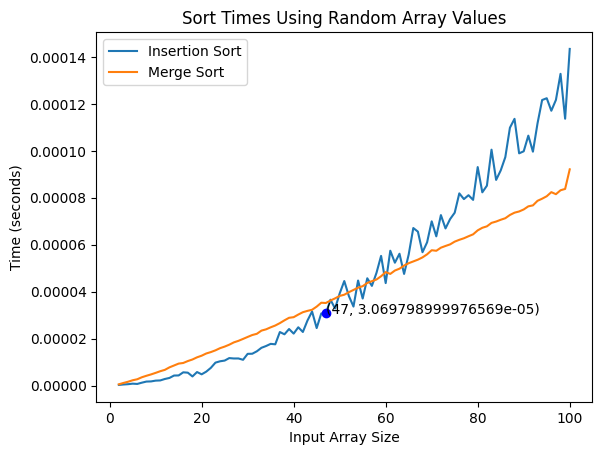

In [28]:
ReducedAverageTest(1)

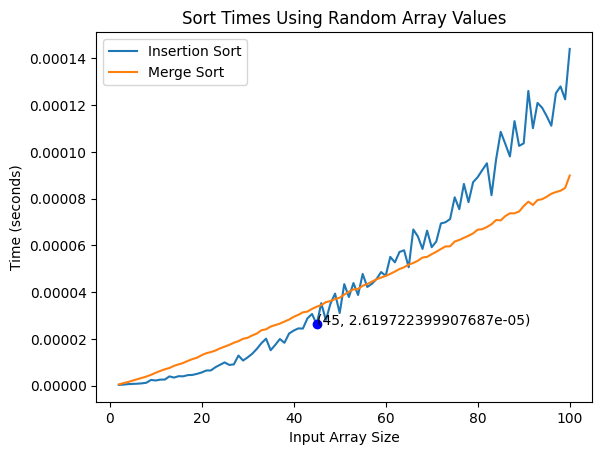

In [29]:
ReducedAverageTest(1)

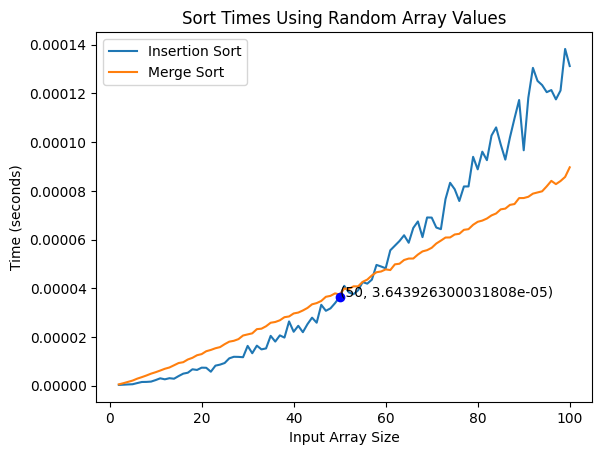

In [30]:
ReducedAverageTest(1)

# Nearly Sorted

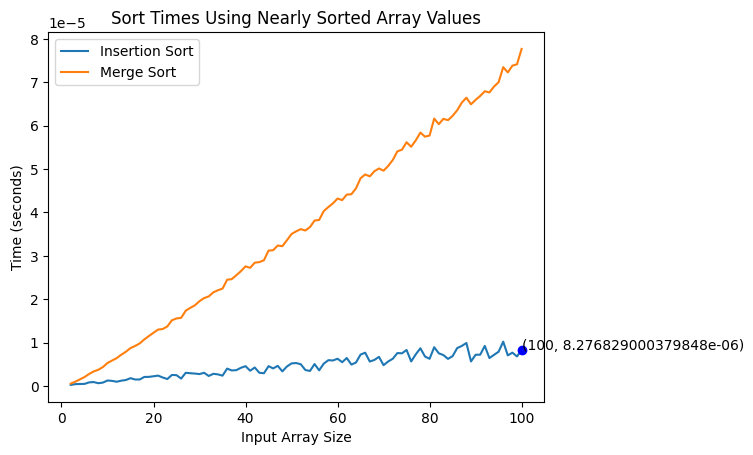

In [31]:
ReducedAverageTest(2)

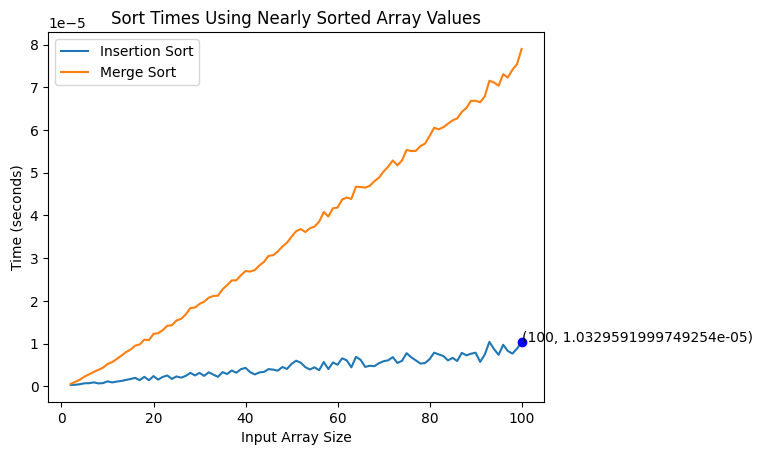

In [32]:
ReducedAverageTest(2)

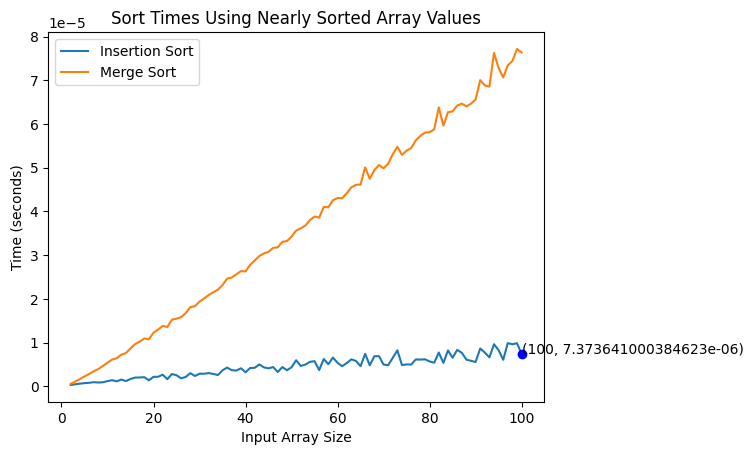

In [33]:
ReducedAverageTest(2)

# Reverse Sorted

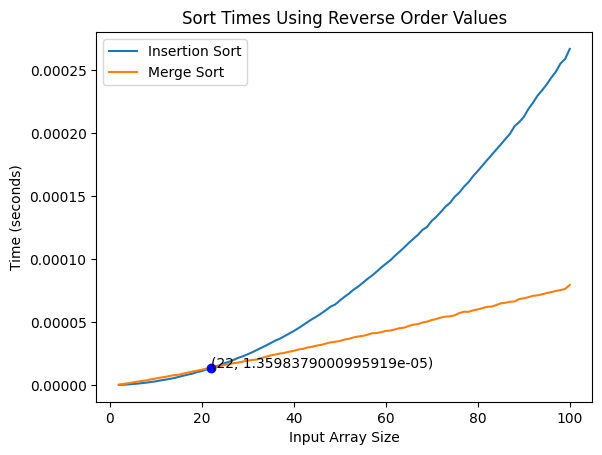

In [34]:
ReducedAverageTest(3)

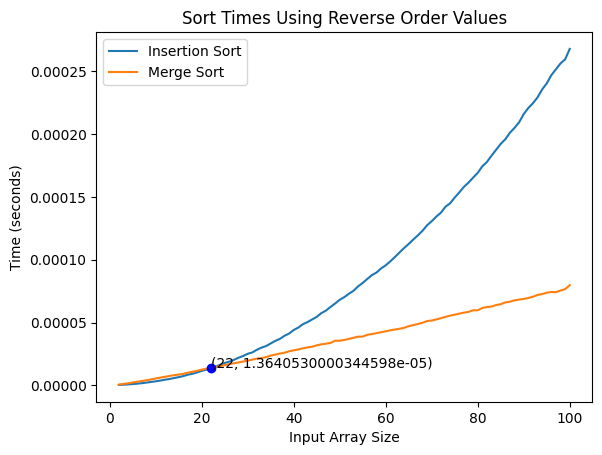

In [35]:
ReducedAverageTest(3)

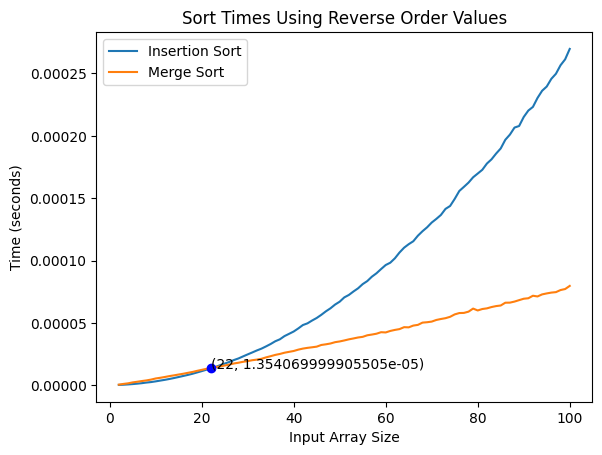

In [36]:
ReducedAverageTest(3)